# Imports

In [67]:
#imports
import torch
import torch.nn as nn
import os
from PIL import Image
import numpy as np
import random
from torchvision import transforms
import cv2
from matplotlib import pyplot as plt
from torch.autograd import Variable
from torchvision.utils import save_image
import time
from torch.utils.data import Dataset, DataLoader, random_split

# HELPER FUNCTIONS

In [80]:
# All helper functions for dataloader
def load_images(path):
    images = []
    valid_images = [".jpeg", ".jpg", '.png']
    for img in os.listdir(path):
        ext = os.path.splitext(img)[1]
        if ext.lower() not in valid_images:
            continue
        else:
            images.append(os.path.join(path, img))
    return images

def denormalize_tensor(normalize_tensor):
    inv_normalize = transforms.Normalize(
        mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255],
        std=[1/0.229, 1/0.224, 1/0.255]
    )
    return inv_normalize(normalize_tensor)

def plot_tensor(input_tensor, label):
    input_tensor = input_tensor.detach().cpu().numpy()
    input_tensor =  np.transpose(input_tensor, (1,2,0))
    plt.figure()
    plt.imshow(input_tensor, cmap='gray')
    plt.title(str(label))

    

# DATALOADERS

In [81]:
class DataloaderGenerator(Dataset):
    def __init__(self, dataset_path, shape=(128, 96)):
        super().__init__()
        self.dataset_path = dataset_path

        self.cloth_directory = 'cloth'
        self.cloth_paths = load_images(os.path.join(self.dataset_path, self.cloth_directory))

        self.cloth_mask_directory = 'cloth-mask'
        self.cloth_mask_paths = load_images(os.path.join(self.dataset_path, self.cloth_mask_directory))

        self.person_image_directory = 'image'
        self.person_image_paths = load_images(os.path.join(self.dataset_path, self.person_image_directory))

        self.image_normalization = transforms.Normalize(
            [0.485, 0.456, 0.406],  # mean
            [0.229, 0.224, 0.225]  # std
        )

        self.mask_normalization = transforms.Normalize(
            [0.5], [0.5]
        )

        self.image_transform = transforms.Compose([
            transforms.Resize(shape),
            transforms.CenterCrop(shape),
            transforms.ToTensor(),
            self.image_normalization
        ])

        self.mask_transform = transforms.Compose([
            transforms.Resize(shape),
            transforms.CenterCrop(shape),
            transforms.ToTensor(),
            self.mask_normalization
        ])

    def __len__(self):
        return len(self.cloth_paths)

    def __getitem__(self, idx):
        cloth_path = self.cloth_paths[idx]
        person_image_path = self.person_image_paths[idx]
        cloth_mask_path = self.cloth_mask_paths[idx]

        target_cloth_idx = random.randint(0, len(self.cloth_paths) - 1)
        target_cloth_path = self.cloth_paths[target_cloth_idx]

        cloth_img = Image.open(cloth_path)
        person_img = Image.open(person_image_path)
        person_mask_img = Image.open(cloth_mask_path)
        target_cloth_img = Image.open(target_cloth_path)

        cloth_img = self.image_transform(cloth_img)
        person_img = self.image_transform(person_img)
        target_cloth_img = self.image_transform(target_cloth_img)
        person_mask_img = self.mask_transform(person_mask_img)

        return cloth_img, person_img, person_mask_img, target_cloth_img

In [82]:
class DataloaderDiscriminator(object):
    def __init__(self, dataset_path, shape=(128, 96)):
        super().__init__()
        self.dataset_path = dataset_path
        self.cloth_directory = 'cloth'
        self.cloth_paths = load_images(os.path.join(self.dataset_path, self.cloth_directory))

        self.person_image_directory = 'image'
        self.person_image_paths = load_images(os.path.join(self.dataset_path, self.person_image_directory))

        self.normalization = transforms.Normalize(
            [0.485, 0.456, 0.406],
            [0.229, 0.224, 0.225]
        )
        self.image_transform = transforms.Compose([
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.Resize(shape),
            transforms.CenterCrop(shape),
            transforms.ToTensor(),
            self.normalization
        ])

    def __len__(self):
        return len(self.cloth_paths)

    def __getitem__(self, idx):
        cloth_path = self.cloth_paths[idx]
        person_image_path = self.person_image_paths[idx]

        cloth_img = Image.open(cloth_path)
        person_img = Image.open(person_image_path)

        cloth_img = self.image_transform(cloth_img)
        person_img = self.image_transform(person_img)

        return cloth_img, person_img


# Testing DataLoaders

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


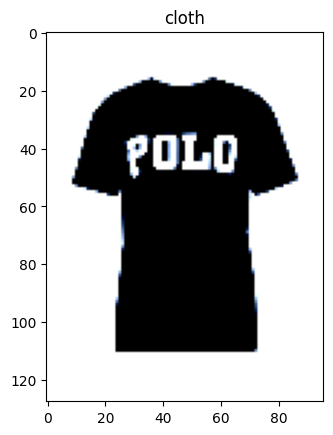

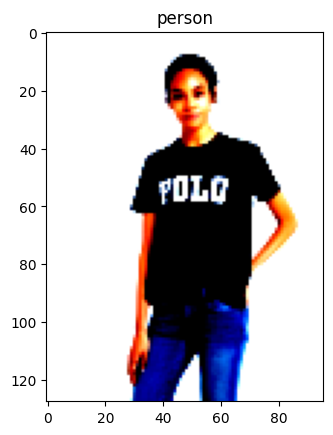

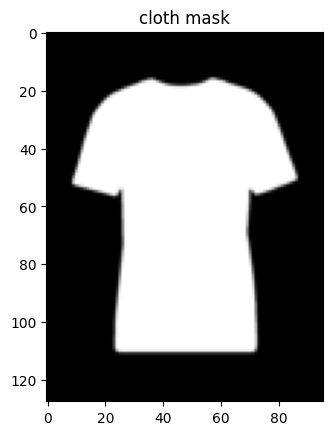

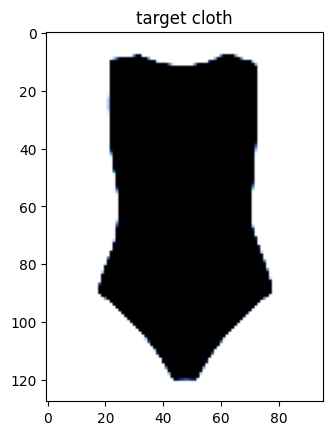

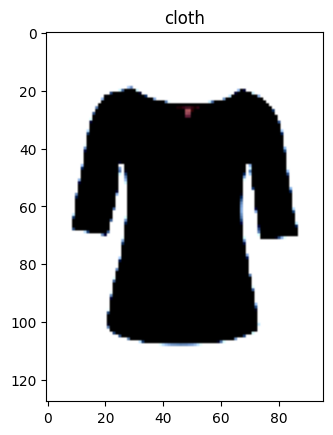

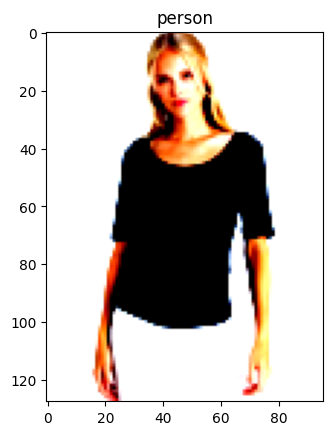

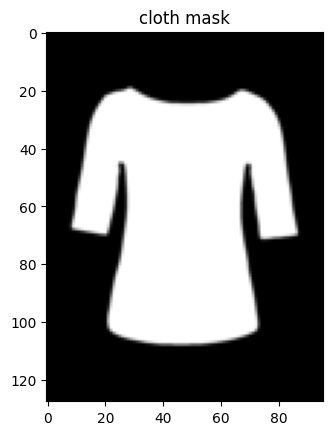

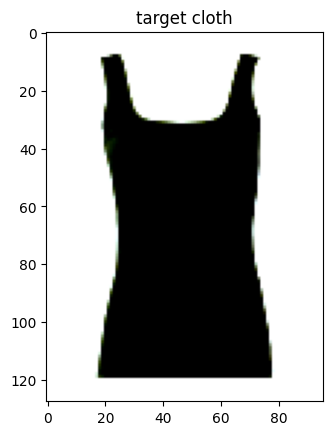

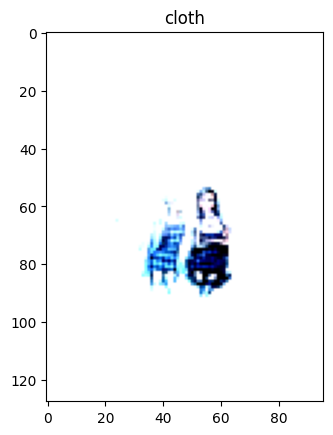

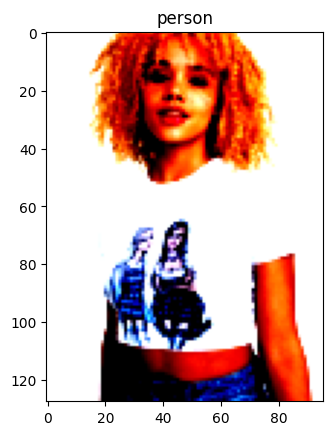

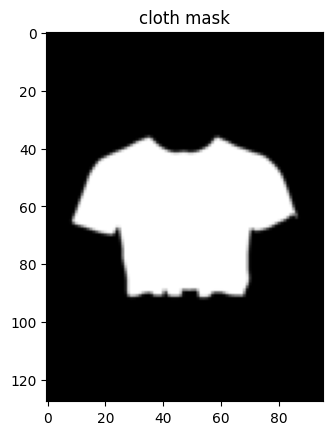

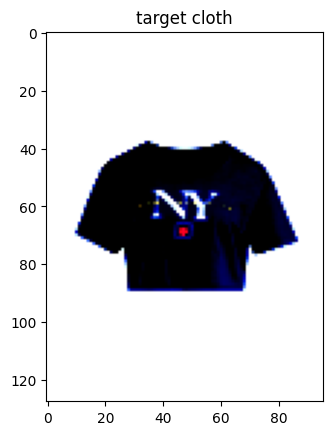

In [47]:

gen =  DataloaderGenerator('/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/Data/zalando-hd-resized/train')
for i in range(3):
    c, p, pm, tc = gen.__getitem__(i)
    plot_tensor(c,'cloth')
    plot_tensor(p,'person')
    plot_tensor(pm,'cloth mask')
    plot_tensor(tc,'target cloth')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


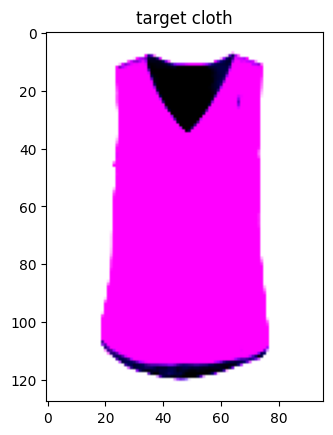

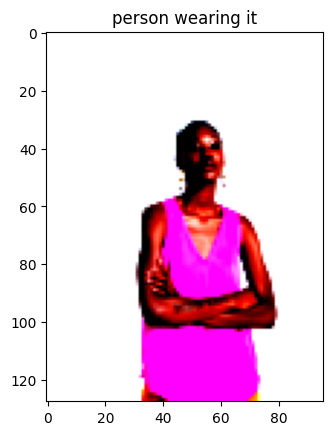

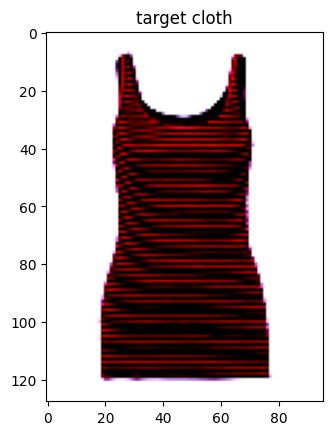

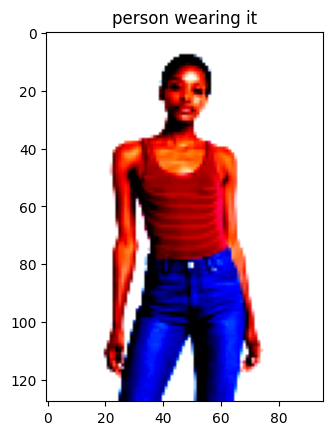

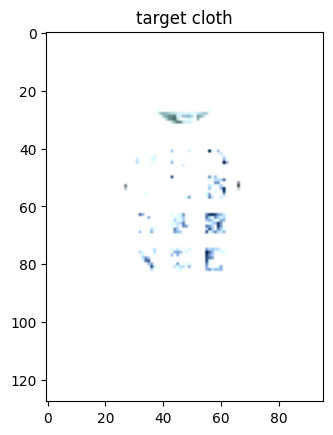

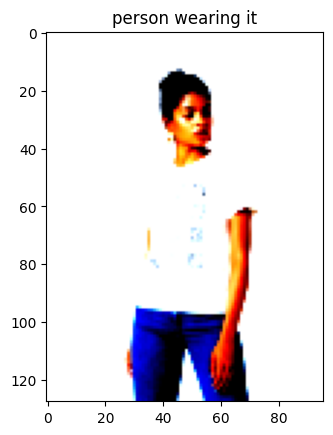

In [48]:
dis =  DataloaderDiscriminator('/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/Data/zalando-hd-resized/train')
for i in range(3):
    j = random.randint(0,11640)
    c, p = dis.__getitem__(j)
    plot_tensor(c,'target cloth')
    plot_tensor(p,'person wearing it')
  

# Model Architecture

In [83]:

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        # Encoder side
        self.encoder = nn.Sequential(
            nn.Conv2d(9, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.InstanceNorm2d(num_features=128),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.InstanceNorm2d(num_features=256),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.InstanceNorm2d(num_features=512),
    
        )

        # Decoder side
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, ),
            nn.InstanceNorm2d(num_features=256),
            nn.ReLU(),
            nn.ConvTranspose2d(512, 128, kernel_size=4, stride=2, padding=1),
            nn.InstanceNorm2d(num_features=128),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 64, kernel_size=4, stride=2, padding=1),
            nn.InstanceNorm2d(num_features=64),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 4, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
        )

    def forward(self, x):
        x_2 = self.encoder[0:2](x)
        x_3 = self.encoder[2:5](x_2)
        x_4 = self.encoder[5:8](x_3)
        x_5 = self.encoder[8:](x_4)
        
        x = x_5
        
        x = self.decoder[0:3](x)
        x = torch.cat([x, x_4], 1)
        x = self.decoder[3:6](x)
        x = torch.cat([x, x_3], 1)
        x = self.decoder[6:9](x)
        x = torch.cat([x, x_2], 1)
        x = self.decoder[9:](x)

        return x


In [84]:

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        # Layers for feature extraction
        self.features = nn.Sequential(
            nn.Conv2d(6, 64, kernel_size=4, stride=2, padding=1,padding_mode='reflect'), #6*128*96
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1,padding_mode='reflect'), #64*64*48
            nn.InstanceNorm2d(num_features=128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1,padding_mode='reflect'), #128*32*24
            nn.InstanceNorm2d(num_features=256),
            nn.LeakyReLU(0.2),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1,padding_mode='reflect'), #256*16*12
            nn.InstanceNorm2d(num_features=512),
            nn.LeakyReLU(0.2),
            nn.Conv2d(512, 1, kernel_size=4, stride=2, padding=1), #512*8*6
             nn.InstanceNorm2d(num_features=1),
            #1*4*3
            nn.Conv2d(1,1, kernel_size=3, stride = 2, padding=1),
            nn.InstanceNorm2d(num_features=1), #1*2*2
        )

        # output layer
        self.output_layer = nn.Sequential(
            nn.Conv2d(1, 1, kernel_size=4, stride=2, padding = 1, padding_mode='reflect'), 
            nn.Sigmoid(), #output = 1*7*5

        )

    

    def forward(self, x):
        x = self.features(x)
        x = self.output_layer(x)
        x = torch.squeeze(x, -1)
        x = torch.squeeze(x, -1)
        return x # real/fake --PatchGAN


In [51]:
def test():
    img_channel = 9
    img_w = 128
    img_h = 96
    x = torch.randn((2,img_channel,img_w,img_h))
    gen = Generator()
    res = gen.forward(x)
    print(res.shape)

if __name__ == "__main__":
    test()

torch.Size([2, 4, 128, 96])


In [85]:
def test():
    img_channel = 6
    img_w = 128
    img_h = 96
    x = torch.randn((2,img_channel,img_w,img_h))
    gen = Discriminator()
    res = gen.forward(x)
    print(res.shape)
    real = torch.ones_like(res)
    print(real.shape)

if __name__ == "__main__":
    test()

torch.Size([2, 1])
torch.Size([2, 1])


# Training Loop

### Parameters

In [86]:
epochs_num = 100
batch_size = 16
lr = 0.0002
device = torch.device("mps")

# Define losses
criterion_GAN = torch.nn.MSELoss()
criterion_cycle = torch.nn.L1Loss() 
criterion_identity = torch.nn.L1Loss() 

### Start training

## Iteration 1

In [75]:
generator = Generator()
discriminator = Discriminator()
generator.to(device)
discriminator.to(device)
generator.train()
discriminator.train()
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas= (0.5,0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5,0.999))
scaler_G = torch.cuda.amp.GradScaler()
scaler_D = torch.cuda.amp.GradScaler()
dataset_path = '/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/Data/zalando-hd-resized/train'
dataloader_generator = torch.utils.data.DataLoader(DataloaderGenerator(dataset_path),
                                                    batch_size=batch_size, shuffle=True, drop_last=True)
dataloader_discriminator = torch.utils.data.DataLoader(DataloaderDiscriminator(dataset_path),
                                                        batch_size=batch_size, shuffle=True, drop_last=True)

torch.autograd.set_detect_anomaly(True)
best_generator_loss = float('inf')
best_discrimnator_loss = float('inf')

for epoch in range(epochs_num):
    start_epoch_time = time.time()
    dataloader_generator_lenght =  len(dataloader_generator)
    for i, (cloth, person_with_cloth, person_with_cloth_mask, target_cloth) in enumerate(dataloader_generator):

        real_cloth = cloth.to(device)
        real_person_with_cloth = person_with_cloth.to(device)
        real_target_cloth = target_cloth.to(device)
        person_with_cloth_mask = person_with_cloth_mask.to(device)

        # Adversarial ground truths
        #valid = Variable(torch.FloatTensor(batch_size, 1).fill_(0.9), requires_grad=False).to(device)
        #fake = Variable(torch.FloatTensor(batch_size, 1).fill_(0.1), requires_grad=False).to(device)

        # -----------------
        #  Train Generators
        # -----------------

        optimizer_G.zero_grad()

        with torch.cuda.amp.autocast():
            
            input_to_generator1 = torch.cat((real_cloth, real_person_with_cloth, real_target_cloth), dim=1)
            output_from_generator1 = generator(input_to_generator1)
            generated_img1, mask1 = torch.split(output_from_generator1, [3, 1], dim=1)
            
            loss_identity_mask1 =  criterion_identity(mask1, person_with_cloth_mask)
            # Gan
            input_to_discriminator_gen_train1 = torch.cat((generated_img1, real_target_cloth), dim=1)
            output_form_discriminator_gen_train1 = discriminator(input_to_discriminator_gen_train1)
            # GAN loss
            loss_gan1 = criterion_GAN(output_form_discriminator_gen_train1, torch.ones_like(output_form_discriminator_gen_train1).to(device)) #made change
            
            input_to_generator2 = torch.cat((real_target_cloth, generated_img1, real_cloth), dim=1)
            output_from_generator2 = generator(input_to_generator2)
            generated_img2, mask2 = torch.split(output_from_generator2, [3, 1], dim=1)
            # identyty loss
            loss_identity_mask2 =  criterion_identity(mask2, person_with_cloth_mask)
            # Gan
            input_to_discriminator_gen_train2 = torch.cat((generated_img2, real_cloth), dim=1)
            output_form_discriminator_gen_train2 = discriminator(input_to_discriminator_gen_train2)
            # GAN loss
            loss_gan2 = criterion_GAN(output_form_discriminator_gen_train2, torch.ones_like(output_form_discriminator_gen_train2).to(device)) #made change
            # cycle
            loss_cycle_gen = criterion_cycle(generated_img2, real_person_with_cloth)
            # loses
            loss_identity_gen = (loss_identity_mask1 + loss_identity_mask2) / 2
            loss_gan = (loss_gan1+loss_gan2)/2
            g_loss = loss_gan + 0.1 * loss_identity_gen + loss_cycle_gen


        scaler_G.scale(g_loss).backward()
        scaler_G.step(optimizer_G)
        scaler_G.update()

        # ---------------------
        #  Train Discriminator
        # ---------------------
        if i % 5 == 0:
            optimizer_D.zero_grad()

            generated_img1 = generated_img1.detach()
            generated_img2 = generated_img2.detach()

            with torch.cuda.amp.autocast():
                # Loss for real images 1
                cloth, person_with_cloth = next(iter(dataloader_discriminator))
                real_cloth = cloth.to(device)
                real_person_with_cloth = person_with_cloth.to(device)

                input_to_discriminator_dis_train_real = torch.cat((real_person_with_cloth, real_cloth), dim=1)
                output_form_discriminator_dis_train = discriminator(input_to_discriminator_dis_train_real)

                d_real_loss = criterion_GAN(output_form_discriminator_dis_train, torch.ones_like(output_form_discriminator_dis_train).to(device)) #made change
                # Loss for real images 2
                cloth, person_with_cloth = next(iter(dataloader_discriminator))
                real_cloth = cloth.to(device)
                real_person_with_cloth = person_with_cloth.to(device)

                input_to_discriminator_dis_train_real = torch.cat((real_person_with_cloth, real_cloth), dim=1)
                output_form_discriminator_dis_train = discriminator(input_to_discriminator_dis_train_real)

                d_real_loss = criterion_GAN(output_form_discriminator_dis_train, torch.ones_like(output_form_discriminator_dis_train).to(device)) #made change
                # Loss for fake images 1
                input_to_discriminator_dis_train_fake1 = torch.cat((generated_img1, real_target_cloth), dim=1)

                output_form_discriminator_dis_train1 = discriminator(input_to_discriminator_dis_train_fake1)

                d_fake_loss1 = criterion_GAN(output_form_discriminator_dis_train1, torch.zeros_like(output_form_discriminator_dis_train1).to(device))
                # Loss for fake images 2
                input_to_discriminator_dis_train_fake2 = torch.cat((generated_img2, real_cloth), dim=1)

                output_form_discriminator_dis_train2 = discriminator(input_to_discriminator_dis_train_fake2)

                d_fake_loss = criterion_GAN(output_form_discriminator_dis_train2, torch.zeros_like(output_form_discriminator_dis_train2).to(device))
                d_loss = (d_real_loss + d_fake_loss) / 2

            scaler_D.scale(d_loss).backward()
            scaler_D.step(optimizer_D)
            scaler_D.update()


    print(
        "[Epoch ", epoch,"] [D loss: ,",d_loss.item(),",] [G loss: ",g_loss.item(),"]"
    )

        
    generator_model_name = "generator_epoch_"+str(epoch+100)
    generator_model_path = os.path.join("/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/Code/WearVision/Fitting Model/Model/Generator/", generator_model_name)

    discriminator_model_name = "discriminator_epoch"+str(epoch+100)
    discriminator_model_path = os.path.join("/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/Code/WearVision/Fitting Model/Model/Discriminator/", discriminator_model_name)

        # save generated image & mask after each epoch
    save_image([tensor for idx, tensor in enumerate(generated_img1.data) if idx <16], f'/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/code/WearVision/Fitting Model/images/images_{epoch+100}.png', nrow=4)
    save_image([tensor for idx, tensor in enumerate(mask1.data) if idx <16], f'/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/code/WearVision/Fitting Model/masks/masks_{epoch+100}.png', nrow=4)
    if g_loss.item() < best_generator_loss:
        torch.save(generator, generator_model_path)
        best_generator_loss = g_loss.item()
    if d_loss.item() < best_discrimnator_loss:
        torch.save(discriminator, discriminator_model_path)
        best_discrimnator_loss = d_loss.item()
    time_per_epoch = time.time() - start_epoch_time
    print("time per epoch: ",time_per_epoch)

/opt/homebrew/Caskroom/miniforge/base/envs/env_DL_project/lib/python3.10/site-packages/torch/cuda/amp/grad_scaler.py:125: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/env_DL_project/lib/python3.10/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


[Epoch  0 ] [D loss: , 0.010291242972016335 ,] [G loss:  0.7261361479759216 ]
time per epoch:  601.2175607681274
[Epoch  1 ] [D loss: , 0.02097695879638195 ,] [G loss:  0.9720883369445801 ]
time per epoch:  597.1411077976227
[Epoch  2 ] [D loss: , 0.0014735051663592458 ,] [G loss:  0.8732318878173828 ]
time per epoch:  561.8026747703552
[Epoch  3 ] [D loss: , 0.015941888093948364 ,] [G loss:  0.8841952085494995 ]
time per epoch:  553.7266690731049
[Epoch  4 ] [D loss: , 0.007796604186296463 ,] [G loss:  0.8054832816123962 ]
time per epoch:  547.0679438114166
[Epoch  5 ] [D loss: , 0.0003801930870395154 ,] [G loss:  0.8215929269790649 ]
time per epoch:  547.583203792572
[Epoch  6 ] [D loss: , 0.017320718616247177 ,] [G loss:  0.8421950340270996 ]
time per epoch:  550.9791400432587
[Epoch  7 ] [D loss: , 0.00024182620109058917 ,] [G loss:  0.8569903373718262 ]
time per epoch:  556.9489920139313
[Epoch  8 ] [D loss: , 0.0004648726899176836 ,] [G loss:  0.8771080374717712 ]
time per epoch:

KeyboardInterrupt: 

## Iteration 2

In [14]:
#generator = Generator()
#discriminator = Discriminator()
generator = torch.load('/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/Code/WearVision/Fitting Model/Model/Generator/generator_epoch_93')
discriminator = torch.load('/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/Code/WearVision/Fitting Model/Model/Discriminator/discriminator_epoch57')
generator.to(device)
discriminator.to(device)
generator.train()
discriminator.train()
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr)
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr)
scaler_G = torch.cuda.amp.GradScaler()
scaler_D = torch.cuda.amp.GradScaler()
dataset_path = '/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/Data/zalando-hd-resized/train'
dataloader_generator = torch.utils.data.DataLoader(DataloaderGenerator(dataset_path),
                                                    batch_size=batch_size, shuffle=True, drop_last=True)
dataloader_discriminator = torch.utils.data.DataLoader(DataloaderDiscriminator(dataset_path),
                                                        batch_size=batch_size, shuffle=True, drop_last=True)

torch.autograd.set_detect_anomaly(True)
best_generator_loss = float('inf')
best_discrimnator_loss = float('inf')

for epoch in range(epochs_num):
    start_epoch_time = time.time()
    dataloader_generator_lenght =  len(dataloader_generator)
    for i, (cloth, person_with_cloth, person_with_cloth_mask, target_cloth) in enumerate(dataloader_generator):

        real_cloth = cloth.to(device)
        real_person_with_cloth = person_with_cloth.to(device)
        real_target_cloth = target_cloth.to(device)
        person_with_cloth_mask = person_with_cloth_mask.to(device)

        # Adversarial ground truths
        valid = Variable(torch.FloatTensor(batch_size, 1).fill_(0.9), requires_grad=False).to(device)
        fake = Variable(torch.FloatTensor(batch_size, 1).fill_(0.1), requires_grad=False).to(device)

        # -----------------
        #  Train Generators
        # -----------------

        optimizer_G.zero_grad()

        with torch.cuda.amp.autocast():
            
            input_to_generator1 = torch.cat((real_cloth, real_person_with_cloth, real_target_cloth), dim=1)
            output_from_generator1 = generator(input_to_generator1)
            generated_img1, mask1 = torch.split(output_from_generator1, [3, 1], dim=1)
            
            loss_identity_mask1 =  criterion_identity(mask1, person_with_cloth_mask)
            # Gan
            input_to_discriminator_gen_train1 = torch.cat((generated_img1, real_target_cloth), dim=1)
            output_form_discriminator_gen_train1 = discriminator(input_to_discriminator_gen_train1)
            # GAN loss
            loss_gan1 = criterion_GAN(output_form_discriminator_gen_train1, valid)
            
            input_to_generator2 = torch.cat((real_target_cloth, generated_img1, real_cloth), dim=1)
            output_from_generator2 = generator(input_to_generator2)
            generated_img2, mask2 = torch.split(output_from_generator2, [3, 1], dim=1)
            # identyty loss
            loss_identity_mask2 =  criterion_identity(mask2, person_with_cloth_mask)
            # Gan
            input_to_discriminator_gen_train2 = torch.cat((generated_img2, real_cloth), dim=1)
            output_form_discriminator_gen_train2 = discriminator(input_to_discriminator_gen_train2)
            # GAN loss
            loss_gan2 = criterion_GAN(output_form_discriminator_gen_train2, valid)
            # cycle
            loss_cycle_gen = criterion_cycle(generated_img2, real_person_with_cloth)
            # loses
            loss_identity_gen = (loss_identity_mask1 + loss_identity_mask2) / 2
            loss_gan = (loss_gan1+loss_gan2)/2
            g_loss = loss_gan + 0.1 * loss_identity_gen + loss_cycle_gen


        scaler_G.scale(g_loss).backward()
        scaler_G.step(optimizer_G)
        scaler_G.update()

        # ---------------------
        #  Train Discriminator
        # ---------------------
        if i % 5 == 0:
            optimizer_D.zero_grad()

            generated_img1 = generated_img1.detach()
            generated_img2 = generated_img2.detach()

            with torch.cuda.amp.autocast():
                # Loss for real images 1
                cloth, person_with_cloth = next(iter(dataloader_discriminator))
                real_cloth = cloth.to(device)
                real_person_with_cloth = person_with_cloth.to(device)

                input_to_discriminator_dis_train_real = torch.cat((real_person_with_cloth, real_cloth), dim=1)
                output_form_discriminator_dis_train = discriminator(input_to_discriminator_dis_train_real)

                d_real_loss = criterion_GAN(output_form_discriminator_dis_train, valid)
                # Loss for real images 2
                cloth, person_with_cloth = next(iter(dataloader_discriminator))
                real_cloth = cloth.to(device)
                real_person_with_cloth = person_with_cloth.to(device)

                input_to_discriminator_dis_train_real = torch.cat((real_person_with_cloth, real_cloth), dim=1)
                output_form_discriminator_dis_train = discriminator(input_to_discriminator_dis_train_real)

                d_real_loss = criterion_GAN(output_form_discriminator_dis_train, valid)
                # Loss for fake images 1
                input_to_discriminator_dis_train_fake1 = torch.cat((generated_img1, real_target_cloth), dim=1)

                output_form_discriminator_dis_train1 = discriminator(input_to_discriminator_dis_train_fake1)

                d_fake_loss1 = criterion_GAN(output_form_discriminator_dis_train1, fake)
                # Loss for fake images 2
                input_to_discriminator_dis_train_fake2 = torch.cat((generated_img2, real_cloth), dim=1)

                output_form_discriminator_dis_train2 = discriminator(input_to_discriminator_dis_train_fake2)

                d_fake_loss = criterion_GAN(output_form_discriminator_dis_train2, fake)
                d_loss = (d_real_loss + d_fake_loss) / 2

            scaler_D.scale(d_loss).backward()
            scaler_D.step(optimizer_D)
            scaler_D.update()


    print(
        "[Epoch ", epoch,"] [D loss: ,",d_loss.item(),",] [G loss: ",g_loss.item(),"]"
    )

        
    generator_model_name = "generator_epoch_"+str(epoch+100)
    generator_model_path = os.path.join("/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/Code/WearVision/Fitting Model/Model/Generator/", generator_model_name)

    discriminator_model_name = "discriminator_epoch"+str(epoch+100)
    discriminator_model_path = os.path.join("/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/Code/WearVision/Fitting Model/Model/Discriminator/", discriminator_model_name)

        # save generated image & mask after each epoch
    save_image([tensor for idx, tensor in enumerate(generated_img1.data) if idx <16], f'/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/code/WearVision/Fitting Model/images/images_{epoch+100}.png', nrow=4)
    save_image([tensor for idx, tensor in enumerate(mask1.data) if idx <16], f'/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/code/WearVision/Fitting Model/masks/masks_{epoch+100}.png', nrow=4)
    if g_loss.item() < best_generator_loss:
        torch.save(generator, generator_model_path)
        best_generator_loss = g_loss.item()
    if d_loss.item() < best_discrimnator_loss:
        torch.save(discriminator, discriminator_model_path)
        best_discrimnator_loss = d_loss.item()
    time_per_epoch = time.time() - start_epoch_time
    print("time per epoch: ",time_per_epoch)

/opt/homebrew/Caskroom/miniforge/base/envs/env_DL_project/lib/python3.10/site-packages/torch/cuda/amp/grad_scaler.py:125: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/env_DL_project/lib/python3.10/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


[Epoch  0 ] [D loss: , 0.1629807949066162 ,] [G loss:  0.32694292068481445 ]
time per epoch:  421.8612849712372
[Epoch  1 ] [D loss: , 0.12855938076972961 ,] [G loss:  0.31566938757896423 ]
time per epoch:  423.20710587501526
[Epoch  2 ] [D loss: , 0.10266242176294327 ,] [G loss:  0.32259225845336914 ]
time per epoch:  420.59716296195984
[Epoch  3 ] [D loss: , 0.10337984561920166 ,] [G loss:  0.30549222230911255 ]
time per epoch:  421.4405839443207
[Epoch  4 ] [D loss: , 0.10217899084091187 ,] [G loss:  0.3063337206840515 ]
time per epoch:  420.87363505363464
[Epoch  5 ] [D loss: , 0.10092305392026901 ,] [G loss:  0.29789718985557556 ]
time per epoch:  422.41969418525696
[Epoch  6 ] [D loss: , 0.11489841341972351 ,] [G loss:  0.33014732599258423 ]
time per epoch:  421.38099694252014
[Epoch  7 ] [D loss: , 0.09544777125120163 ,] [G loss:  0.2915761470794678 ]
time per epoch:  421.7593870162964
[Epoch  8 ] [D loss: , 0.09420941770076752 ,] [G loss:  0.3390483856201172 ]
time per epoch:  

KeyboardInterrupt: 

## Iteration 3

In [87]:
generator = Generator()
discriminator = Discriminator()
generator.to(device)
discriminator.to(device)
generator.train()
discriminator.train()
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas= (0.5,0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5,0.999))
scaler_G = torch.cuda.amp.GradScaler()
scaler_D = torch.cuda.amp.GradScaler()
dataset_path = '/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/Data/zalando-hd-resized/train'
dataloader_generator = torch.utils.data.DataLoader(DataloaderGenerator(dataset_path),
                                                    batch_size=batch_size, shuffle=True, drop_last=True)
dataloader_discriminator = torch.utils.data.DataLoader(DataloaderDiscriminator(dataset_path),
                                                        batch_size=batch_size, shuffle=True, drop_last=True)

torch.autograd.set_detect_anomaly(True)
best_generator_loss = float('inf')
best_discrimnator_loss = float('inf')

for epoch in range(epochs_num):
    start_epoch_time = time.time()
    dataloader_generator_lenght =  len(dataloader_generator)
    for i, (cloth, person_with_cloth, person_with_cloth_mask, target_cloth) in enumerate(dataloader_generator):

        real_cloth = cloth.to(device)
        real_person_with_cloth = person_with_cloth.to(device)
        real_target_cloth = target_cloth.to(device)
        person_with_cloth_mask = person_with_cloth_mask.to(device)

        # Adversarial ground truths
        valid = Variable(torch.FloatTensor(batch_size, 1).fill_(0.9), requires_grad=False).to(device)
        fake = Variable(torch.FloatTensor(batch_size, 1).fill_(0.1), requires_grad=False).to(device)

        # -----------------
        #  Train Generators
        # -----------------

        optimizer_G.zero_grad()

        with torch.cuda.amp.autocast():
            
            input_to_generator1 = torch.cat((real_cloth, real_person_with_cloth, real_target_cloth), dim=1)
            output_from_generator1 = generator(input_to_generator1)
            generated_img1, mask1 = torch.split(output_from_generator1, [3, 1], dim=1)
            
            loss_identity_mask1 =  criterion_identity(mask1, person_with_cloth_mask)
            # Gan
            input_to_discriminator_gen_train1 = torch.cat((generated_img1, real_target_cloth), dim=1)
            output_form_discriminator_gen_train1 = discriminator(input_to_discriminator_gen_train1)
            # GAN loss
            loss_gan1 = criterion_GAN(output_form_discriminator_gen_train1, valid) #made change
            
            input_to_generator2 = torch.cat((real_target_cloth, generated_img1, real_cloth), dim=1)
            output_from_generator2 = generator(input_to_generator2)
            generated_img2, mask2 = torch.split(output_from_generator2, [3, 1], dim=1)
            # identyty loss
            loss_identity_mask2 =  criterion_identity(mask2, person_with_cloth_mask)
            # Gan
            input_to_discriminator_gen_train2 = torch.cat((generated_img2, real_cloth), dim=1)
            output_form_discriminator_gen_train2 = discriminator(input_to_discriminator_gen_train2)
            # GAN loss
            loss_gan2 = criterion_GAN(output_form_discriminator_gen_train2, valid) #made change
            # cycle
            loss_cycle_gen = criterion_cycle(generated_img2, real_person_with_cloth)
            # loses
            loss_identity_gen = (loss_identity_mask1 + loss_identity_mask2) / 2
            loss_gan = (loss_gan1+loss_gan2)/2
            g_loss = loss_gan + 0.1 * loss_identity_gen + loss_cycle_gen


        scaler_G.scale(g_loss).backward()
        scaler_G.step(optimizer_G)
        scaler_G.update()

        # ---------------------
        #  Train Discriminator
        # ---------------------
        if i % 5 == 0:
            optimizer_D.zero_grad()

            generated_img1 = generated_img1.detach()
            generated_img2 = generated_img2.detach()

            with torch.cuda.amp.autocast():
                # Loss for real images 1
                cloth, person_with_cloth = next(iter(dataloader_discriminator))
                real_cloth = cloth.to(device)
                real_person_with_cloth = person_with_cloth.to(device)

                input_to_discriminator_dis_train_real = torch.cat((real_person_with_cloth, real_cloth), dim=1)
                output_form_discriminator_dis_train = discriminator(input_to_discriminator_dis_train_real)

                d_real_loss = criterion_GAN(output_form_discriminator_dis_train, valid) #made change
                # Loss for real images 2
                cloth, person_with_cloth = next(iter(dataloader_discriminator))
                real_cloth = cloth.to(device)
                real_person_with_cloth = person_with_cloth.to(device)

                input_to_discriminator_dis_train_real = torch.cat((real_person_with_cloth, real_cloth), dim=1)
                output_form_discriminator_dis_train = discriminator(input_to_discriminator_dis_train_real)

                d_real_loss = criterion_GAN(output_form_discriminator_dis_train, valid) #made change
                # Loss for fake images 1
                input_to_discriminator_dis_train_fake1 = torch.cat((generated_img1, real_target_cloth), dim=1)

                output_form_discriminator_dis_train1 = discriminator(input_to_discriminator_dis_train_fake1)

                d_fake_loss1 = criterion_GAN(output_form_discriminator_dis_train1, fake) #made change
                # Loss for fake images 2
                input_to_discriminator_dis_train_fake2 = torch.cat((generated_img2, real_cloth), dim=1)

                output_form_discriminator_dis_train2 = discriminator(input_to_discriminator_dis_train_fake2)

                d_fake_loss = criterion_GAN(output_form_discriminator_dis_train2, fake) #made change
                d_loss = (d_real_loss + d_fake_loss) / 2

            scaler_D.scale(d_loss).backward()
            scaler_D.step(optimizer_D)
            scaler_D.update()


    print(
        "[Epoch ", epoch,"] [D loss: ,",d_loss.item(),",] [G loss: ",g_loss.item(),"]"
    )

        
    generator_model_name = "generator_epoch_"+str(epoch)
    generator_model_path = os.path.join("/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/Code/WearVision/Fitting Model/Model/Generator/", generator_model_name)

    discriminator_model_name = "discriminator_epoch"+str(epoch)
    discriminator_model_path = os.path.join("/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/Code/WearVision/Fitting Model/Model/Discriminator/", discriminator_model_name)

        # save generated image & mask after each epoch
    save_image([tensor for idx, tensor in enumerate(generated_img1.data) if idx <16], f'/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/code/WearVision/Fitting Model/images/images_{epoch}.png', nrow=4)
    save_image([tensor for idx, tensor in enumerate(mask1.data) if idx <16], f'/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/WearVision/code/WearVision/Fitting Model/masks/masks_{epoch}.png', nrow=4)
    if g_loss.item() < best_generator_loss:
        torch.save(generator, generator_model_path)
        best_generator_loss = g_loss.item()
    if d_loss.item() < best_discrimnator_loss:
        torch.save(discriminator, discriminator_model_path)
        best_discrimnator_loss = d_loss.item()
    time_per_epoch = time.time() - start_epoch_time
    print("time per epoch: ",time_per_epoch)

[Epoch  0 ] [D loss: , 0.04316723719239235 ,] [G loss:  0.6013880968093872 ]
time per epoch:  588.7559387683868
[Epoch  1 ] [D loss: , 0.018168054521083832 ,] [G loss:  0.618731677532196 ]
time per epoch:  567.2720358371735
[Epoch  2 ] [D loss: , 0.008112234063446522 ,] [G loss:  0.6551225185394287 ]
time per epoch:  549.6597397327423
[Epoch  3 ] [D loss: , 0.01618894748389721 ,] [G loss:  0.6056830286979675 ]
time per epoch:  547.0003798007965
[Epoch  4 ] [D loss: , 0.001321576302871108 ,] [G loss:  0.7483167052268982 ]
time per epoch:  543.3431377410889
[Epoch  5 ] [D loss: , 0.01790737174451351 ,] [G loss:  0.5968384742736816 ]
time per epoch:  543.1591610908508
[Epoch  6 ] [D loss: , 0.0007335040718317032 ,] [G loss:  0.651529848575592 ]
time per epoch:  546.0359148979187
[Epoch  7 ] [D loss: , 0.0029693690594285727 ,] [G loss:  0.6763607859611511 ]
time per epoch:  548.7833878993988
[Epoch  8 ] [D loss: , 0.0014505884610116482 ,] [G loss:  0.6849954128265381 ]
time per epoch:  545

KeyboardInterrupt: 